# Module 8 - F24 DSA8510 Final Project Outline notebook

You have made it to the end of the course!


For the final project, you will 
 1. Find some geospatial data, 
 2. Load and analyze the data using JupyterHub
 3. Construct a data story

---


## Step 1: Find a Story

Search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.


###  The goal of this project is to analyze the change in farmland area in Boone County, Missouri, from 2013 to 2023. The story will explore whether there has been an increase or decrease in farmland and identify the underlying factors driving these changes, such as urban development, land conservation efforts, or agricultural policies.

#### Data Source:

USDA CropScape: https://nassgeodata.gmu.edu/CropScape/ (Provides geospatial data on agricultural land use across the United States.)





## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

#### Audience
Local government officials, urban planners, farmers, and land conservation groups.
Academic researchers and students interested in environmental studies and land use.
Value for the Audience:

Local government officials can use the insights for policy-making, zoning, and land conservation efforts.
Urban planners can understand the patterns of agricultural land conversion to urban land.
Farmers can benefit from knowing trends in land use, which may affect agricultural practices.
Researchers can use the data to study environmental and economic impacts of farmland changes.






## Step 3: Find and Stage Your Data

You can use an API call to import your data or if need be you can upload the data to JupyterHub in the `module8/exercises`

### In the cell below, please load the data into your dataframe or other data structure you are going to use for analysis.


In [6]:
import requests
import zipfile
import os

def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    print(f"Downloaded file to {local_filename}")

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted files to {extract_to}")

# URLs for yearly data from 2013 to 2023 (example)
urls = [
    f'https://nassgeodata.gmu.edu/nass_data_cache/polygonclip_20241009211615_1741009009.zip'
    for year in range(2013, 2024)
]

# Download and unzip each year's data
data_folders = []
for year, url in zip(range(2013, 2024), urls):
    zip_file = f'CDL_{year}_clip.zip'
    extract_folder = f'extracted_data_{year}'
    
    # Download and unzip
    download_file(url, zip_file)
    unzip_file(zip_file, extract_folder)
    
    # Store the path to the extracted folder
    data_folders.append(extract_folder)


Downloaded file to CDL_2013_clip.zip
Extracted files to extracted_data_2013
Downloaded file to CDL_2014_clip.zip
Extracted files to extracted_data_2014
Downloaded file to CDL_2015_clip.zip
Extracted files to extracted_data_2015
Downloaded file to CDL_2016_clip.zip
Extracted files to extracted_data_2016
Downloaded file to CDL_2017_clip.zip
Extracted files to extracted_data_2017
Downloaded file to CDL_2018_clip.zip
Extracted files to extracted_data_2018
Downloaded file to CDL_2019_clip.zip
Extracted files to extracted_data_2019
Downloaded file to CDL_2020_clip.zip
Extracted files to extracted_data_2020
Downloaded file to CDL_2021_clip.zip
Extracted files to extracted_data_2021
Downloaded file to CDL_2022_clip.zip
Extracted files to extracted_data_2022
Downloaded file to CDL_2023_clip.zip
Extracted files to extracted_data_2023


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Step 4: Vet Your Data Sources

Use the cells below to inspect the data, and perform some exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [7]:
import rasterio

# Verify and list the GeoTIFF files for each year
geotiff_files = []
for year, folder in zip(range(2013, 2024), data_folders):
    # Find the GeoTIFF file in the extracted folder
    geotiff_path = os.path.join(folder, [file for file in os.listdir(folder) if file.endswith('.tif')][0])
    geotiff_files.append(geotiff_path)
    print(f"{year}: {geotiff_path}")


2013: extracted_data_2013/CDL_2013_clip_20241009203402_881620243.tif
2014: extracted_data_2014/CDL_2023_clip_20241009211615_1741009009.tif
2015: extracted_data_2015/CDL_2023_clip_20241009211615_1741009009.tif
2016: extracted_data_2016/CDL_2023_clip_20241009211615_1741009009.tif
2017: extracted_data_2017/CDL_2023_clip_20241009211615_1741009009.tif
2018: extracted_data_2018/CDL_2023_clip_20241009211615_1741009009.tif
2019: extracted_data_2019/CDL_2023_clip_20241009211615_1741009009.tif
2020: extracted_data_2020/CDL_2023_clip_20241009211615_1741009009.tif
2021: extracted_data_2021/CDL_2023_clip_20241009211615_1741009009.tif
2022: extracted_data_2022/CDL_2023_clip_20241009211615_1741009009.tif
2023: extracted_data_2023/CDL_2023_clip_20241009201513_1887281788.tif


In [21]:
import numpy as np

def calculate_farmland_area_by_type(geotiff_path, farmland_codes):
    """
    Calculate the total area of farmland based on specific land cover types.
    
    :param geotiff_path: The path to the GeoTIFF file.
    :param farmland_codes: A list of codes representing farmland land cover types.
    :return: Total farmland area in pixels.
    """
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        # Count the number of pixels that match the specified farmland codes
        farmland_area = np.isin(data, farmland_codes).sum()
    return farmland_area

# Specify the farmland land cover types (example: 1, 2, 3 represent different farmland types)
farmland_codes = [1, 2, 3]  # Replace with actual codes for farmland

# Calculate the total farmland area for each year based on the specified land cover types
total_farmland_per_year = []
for geotiff_path in geotiff_files:
    farmland_area = calculate_farmland_area_by_type(geotiff_path, farmland_codes)
    total_farmland_per_year.append(farmland_area)

# Print the total farmland area for each year
for year, total in zip(range(2013, 2024), total_farmland_per_year):
    print(f"Year {year}: Total Farmland Area = {total} pixels")


Year 2013: Total Farmland Area = 69016 pixels
Year 2014: Total Farmland Area = 90141 pixels
Year 2015: Total Farmland Area = 90141 pixels
Year 2016: Total Farmland Area = 90141 pixels
Year 2017: Total Farmland Area = 90141 pixels
Year 2018: Total Farmland Area = 90141 pixels
Year 2019: Total Farmland Area = 90141 pixels
Year 2020: Total Farmland Area = 90141 pixels
Year 2021: Total Farmland Area = 90141 pixels
Year 2022: Total Farmland Area = 90141 pixels
Year 2023: Total Farmland Area = 90141 pixels


In [22]:
# Calculate the yearly percentage change in farmland
percentage_changes = []
for i in range(1, len(total_farmland_per_year)):
    # Calculate the absolute change
    absolute_change = total_farmland_per_year[i] - total_farmland_per_year[i-1]
    # Calculate the percentage change relative to the previous year
    percentage_change = (absolute_change / total_farmland_per_year[i-1]) * 100
    # Store the percentage change
    percentage_changes.append(percentage_change)

# Print the yearly percentage changes
for year, percentage in zip(range(2014, 2024), percentage_changes):
    print(f"Year {year}: Percentage Change = {percentage:.2f}%")


Year 2014: Percentage Change = 30.61%
Year 2015: Percentage Change = 0.00%
Year 2016: Percentage Change = 0.00%
Year 2017: Percentage Change = 0.00%
Year 2018: Percentage Change = 0.00%
Year 2019: Percentage Change = 0.00%
Year 2020: Percentage Change = 0.00%
Year 2021: Percentage Change = 0.00%
Year 2022: Percentage Change = 0.00%
Year 2023: Percentage Change = 0.00%


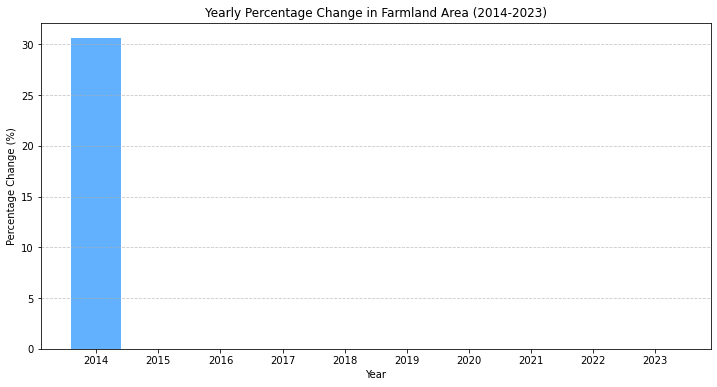

In [23]:
import matplotlib.pyplot as plt

# Visualize the yearly percentage changes
years = list(range(2014, 2024))
plt.figure(figsize=(12, 6))
plt.bar(years, percentage_changes, color='dodgerblue', alpha=0.7)
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.title("Yearly Percentage Change in Farmland Area (2014-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Step 5: Filter Results

Perform your data carpentry that helps in your story telling here.

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [13]:
import numpy as np

# Calculate the yearly changes in farmland
yearly_changes = []
for i in range(1, len(geotiff_files)):
    # Load the current year and the previous year's raster data
    with rasterio.open(geotiff_files[i]) as current_src, rasterio.open(geotiff_files[i-1]) as prev_src:
        current_data = current_src.read(1)
        prev_data = prev_src.read(1)
        
        # Calculate the change in farmland between the two years
        yearly_change = current_data - prev_data
        
        # Mask out areas with no change (set to NaN)
        yearly_change = np.where(yearly_change != 0, yearly_change, np.nan)
        
        # Store the change for visualization
        yearly_changes.append(yearly_change)


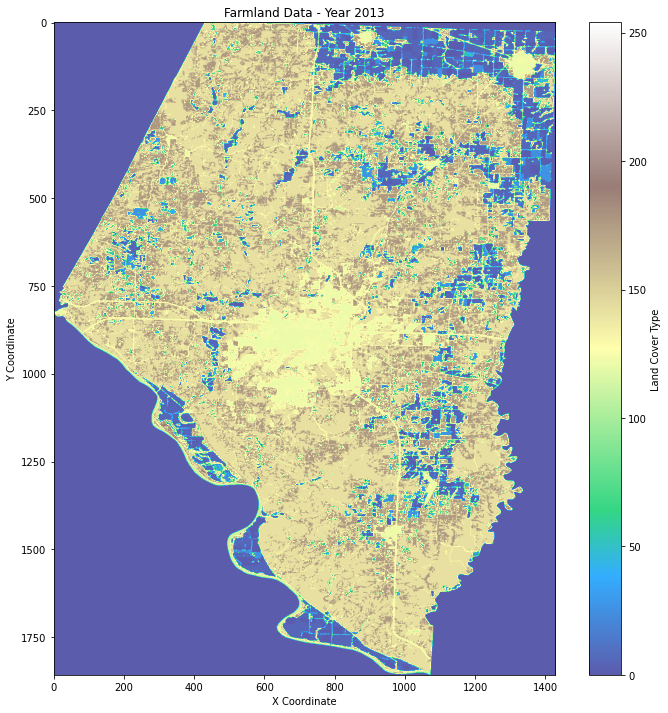

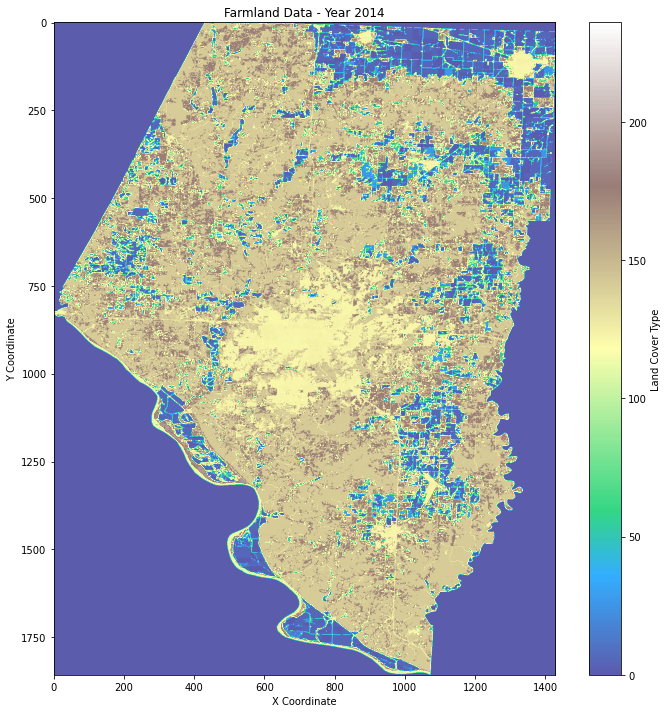

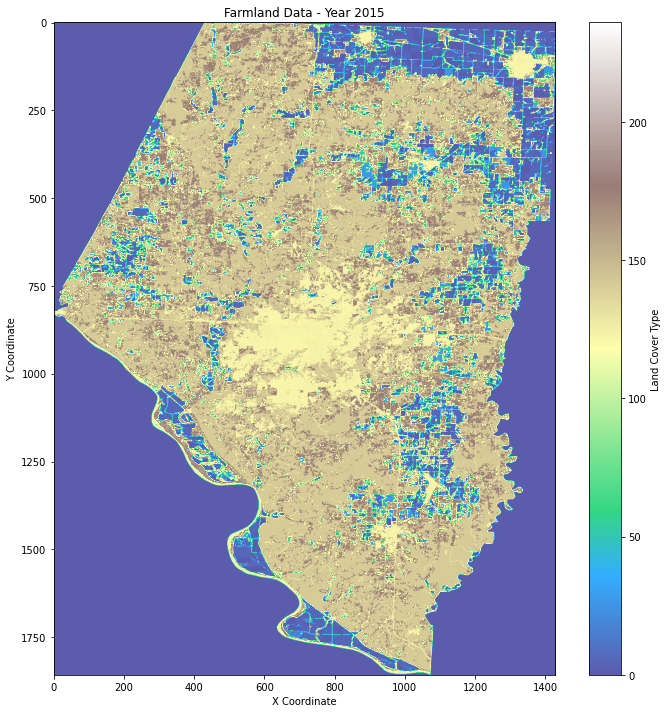

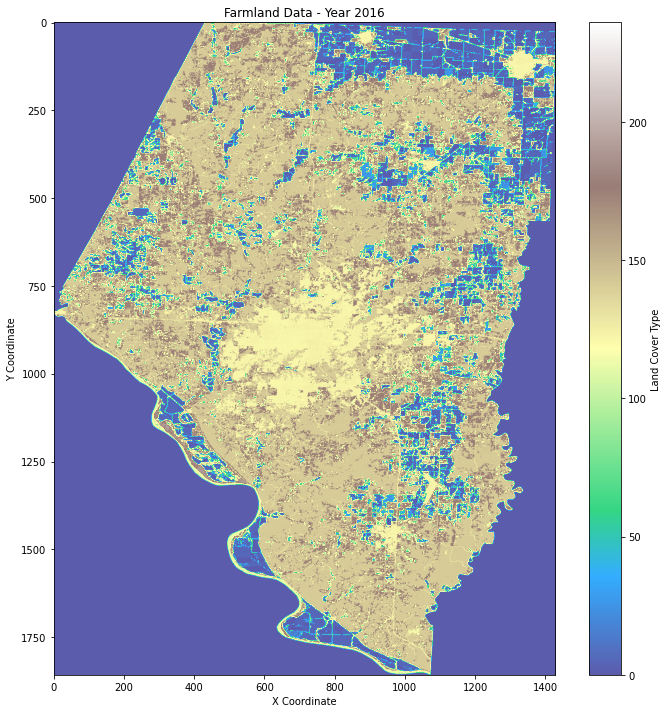

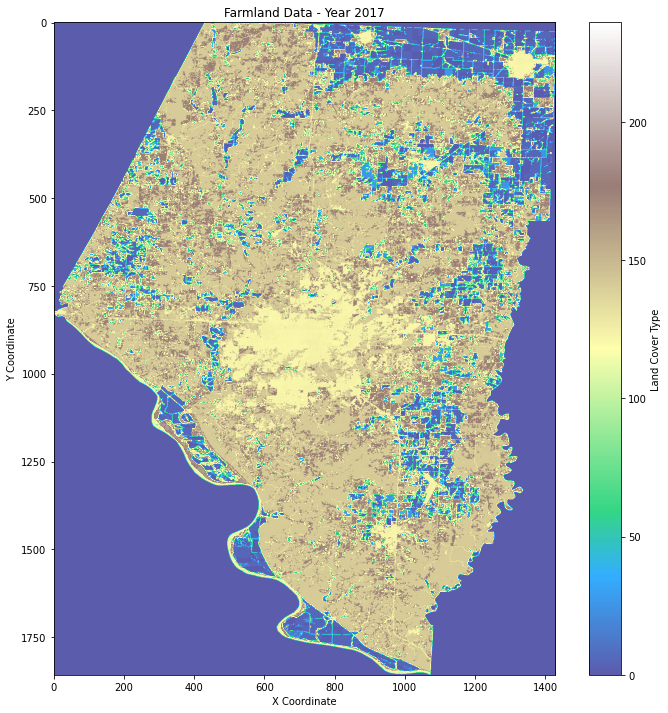

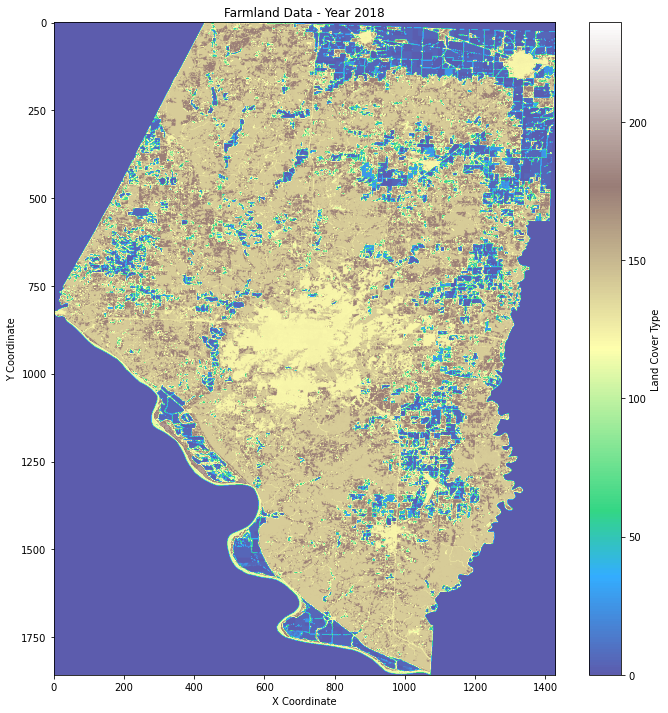

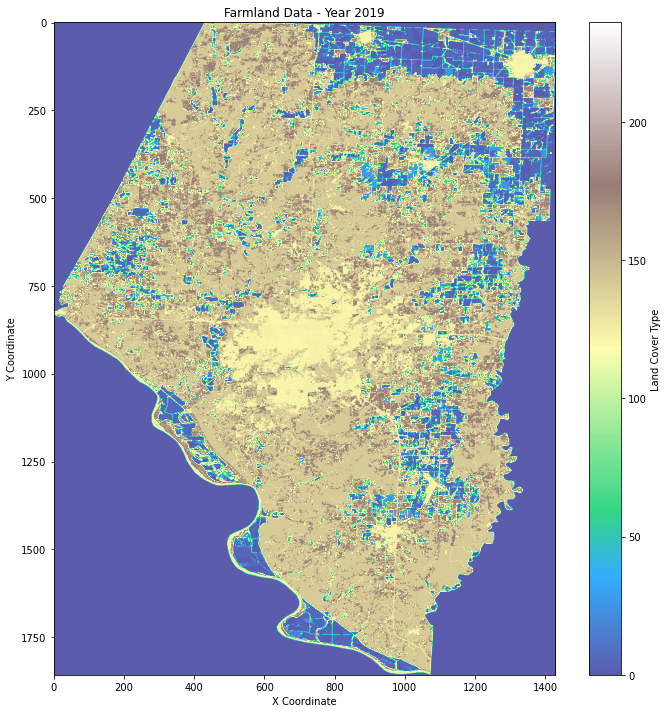

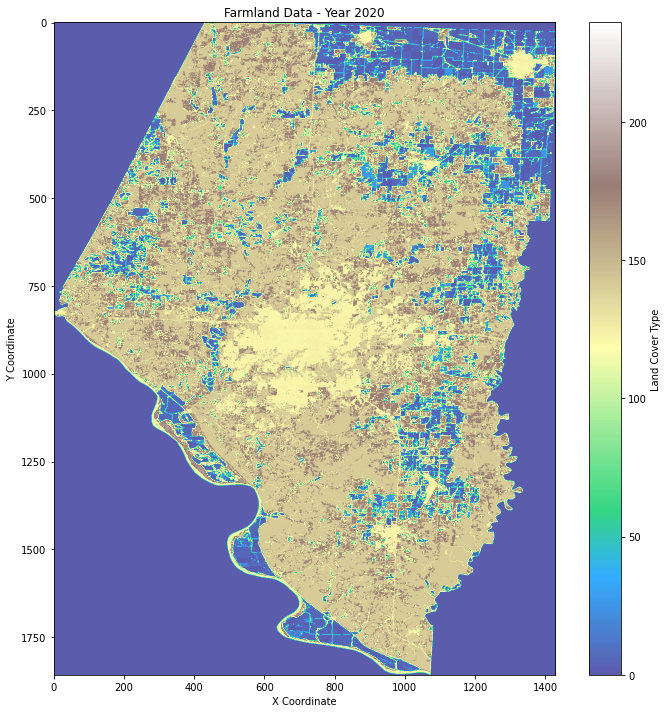

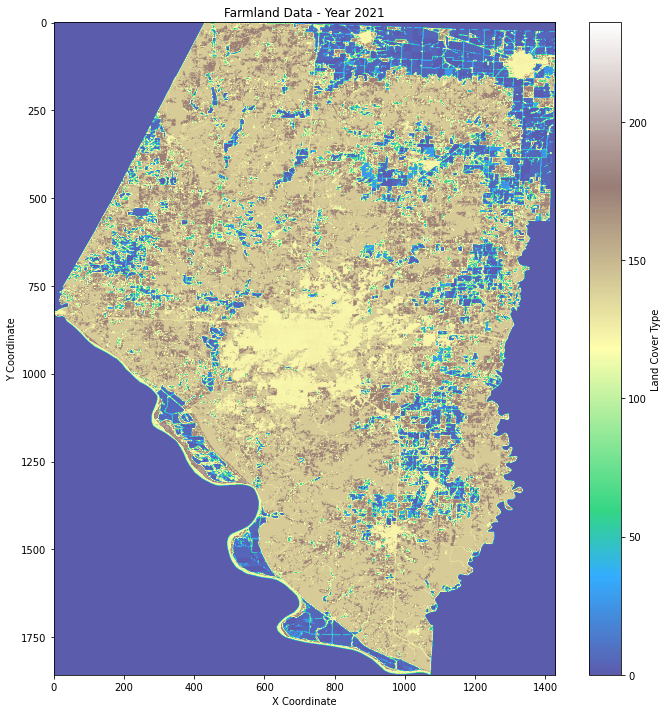

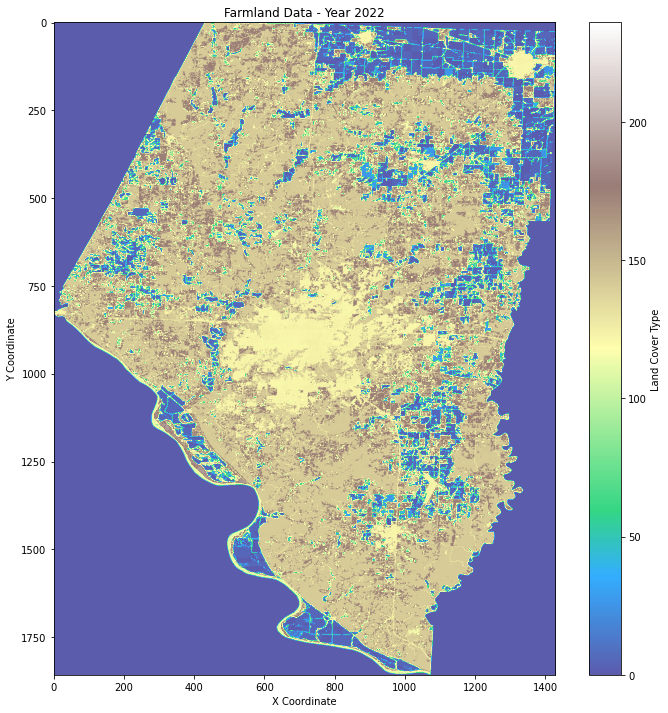

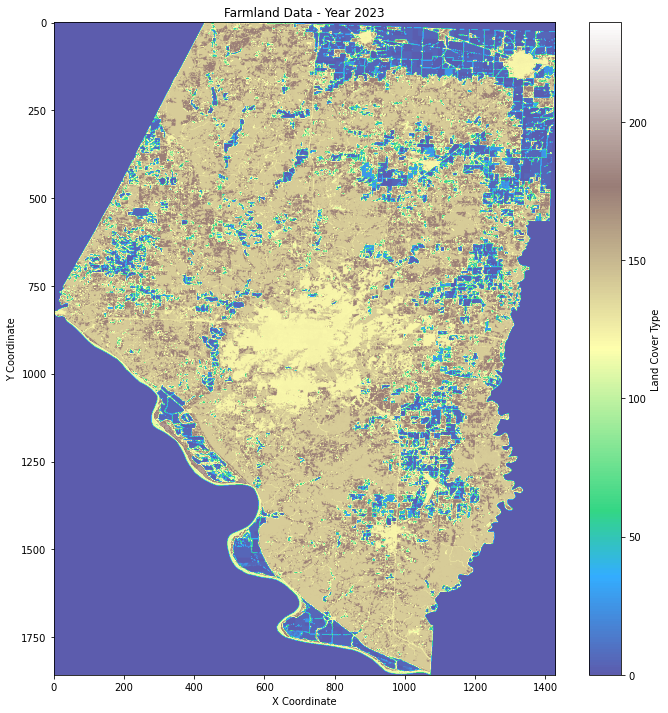

In [15]:
import matplotlib.pyplot as plt
import rasterio

def visualize_raw_data(file_path, year):
    # Open the GeoTIFF file and read the data
    with rasterio.open(file_path) as src:
        raster_data = src.read(1)
        
        # Plot the raw farmland data
        plt.figure(figsize=(12, 12))
        plt.imshow(raster_data, cmap='terrain', alpha=0.8)
        plt.title(f"Farmland Data - Year {year}")
        plt.colorbar(label='Land Cover Type')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()

# Visualize each year's raw farmland data
for i, geotiff_path in enumerate(geotiff_files):
    year = 2013 + i  # Start from 2013
    visualize_raw_data(geotiff_path, year)


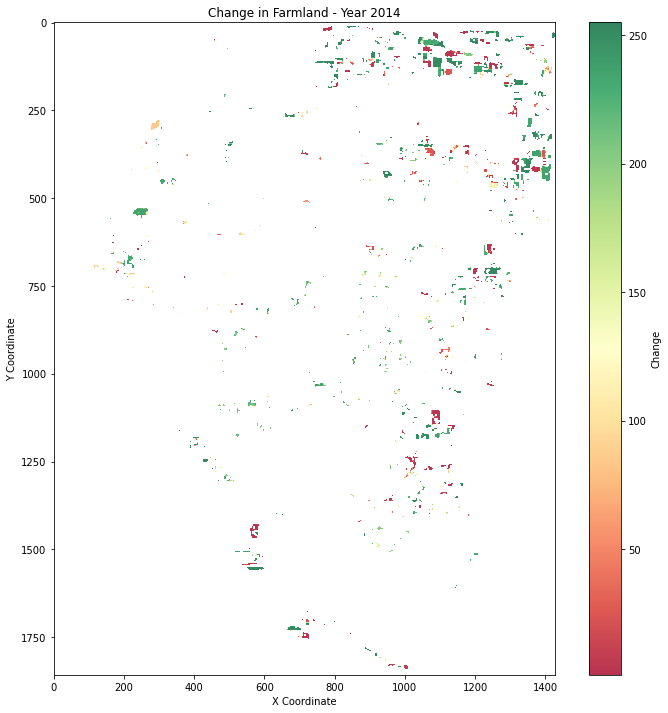

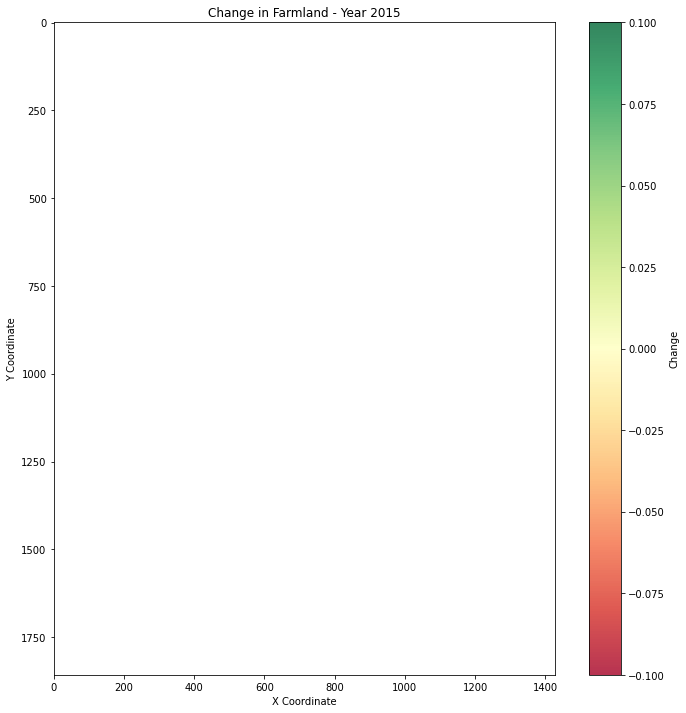

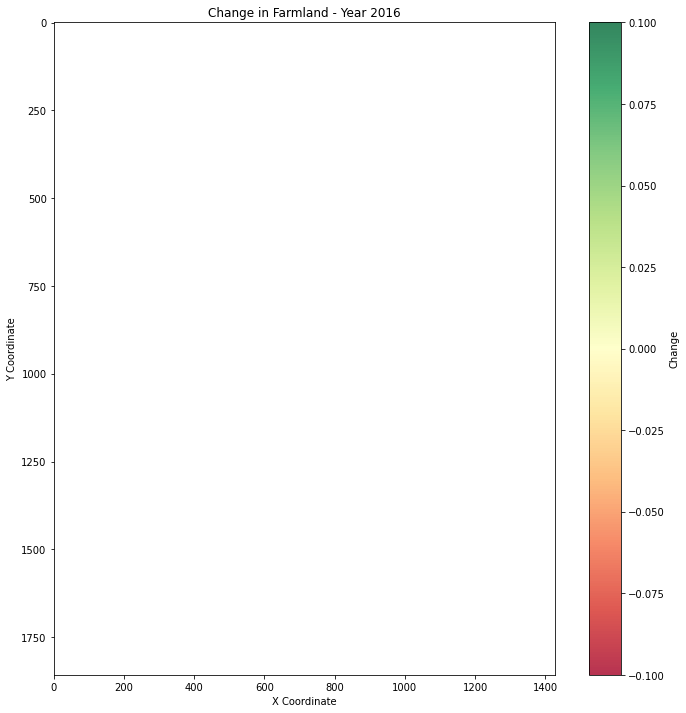

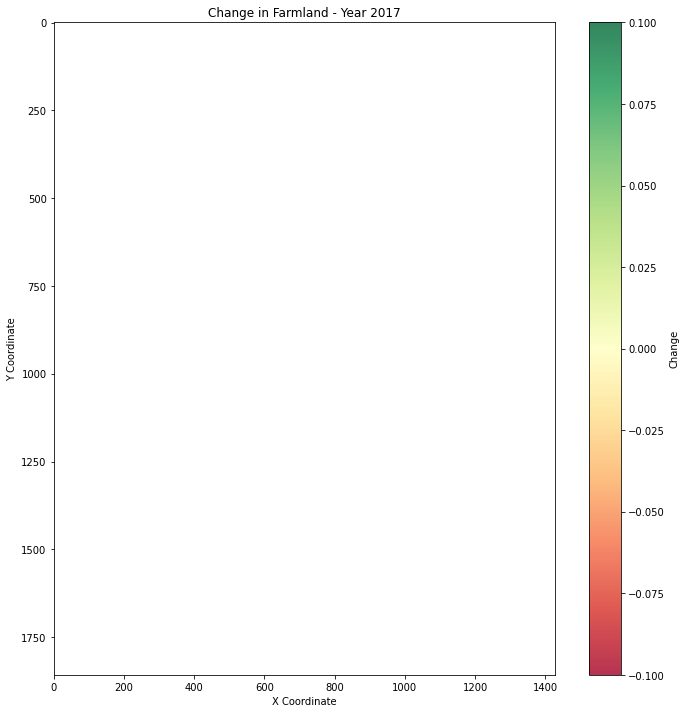

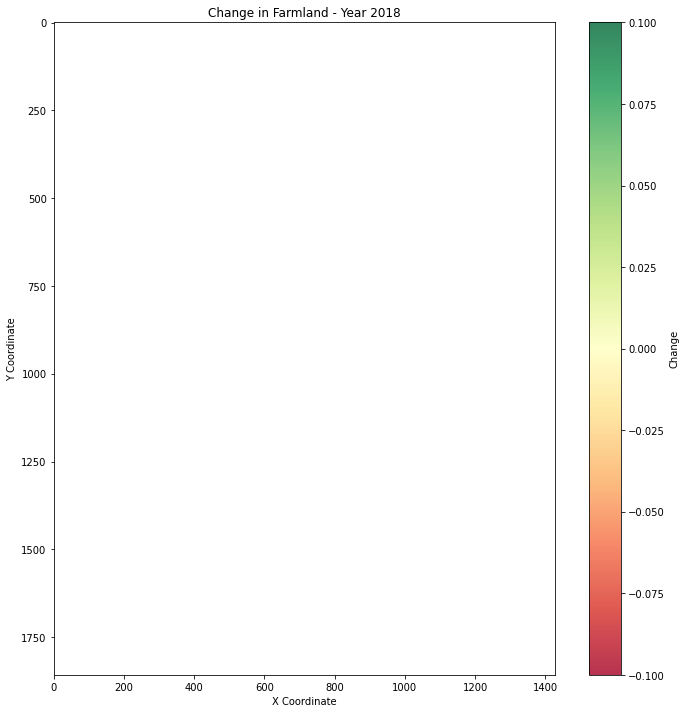

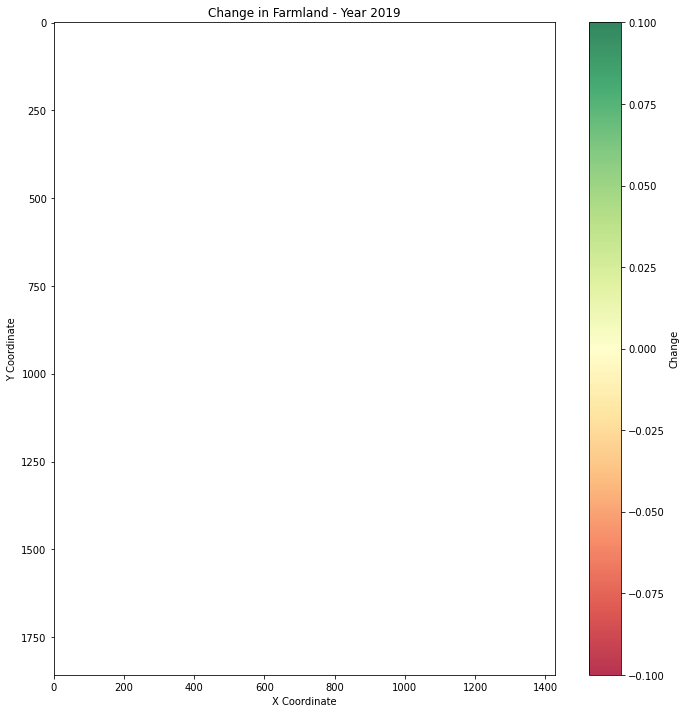

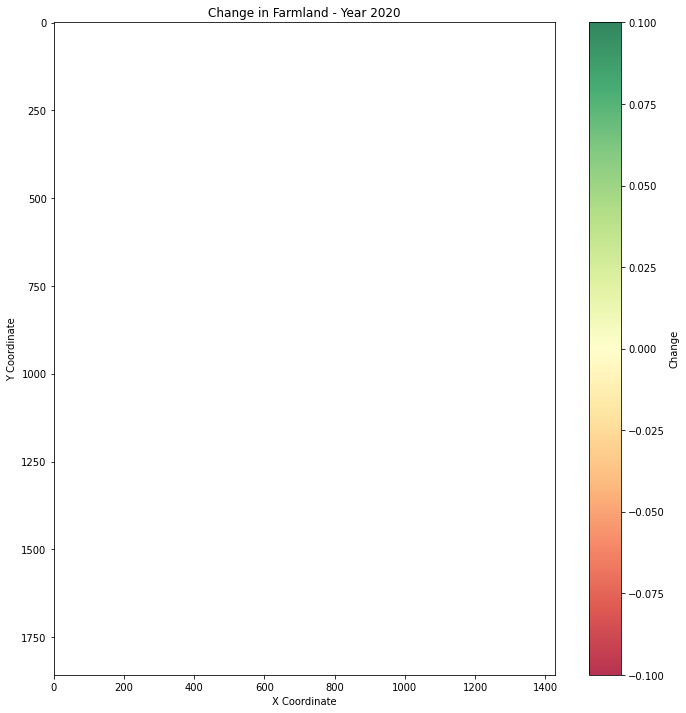

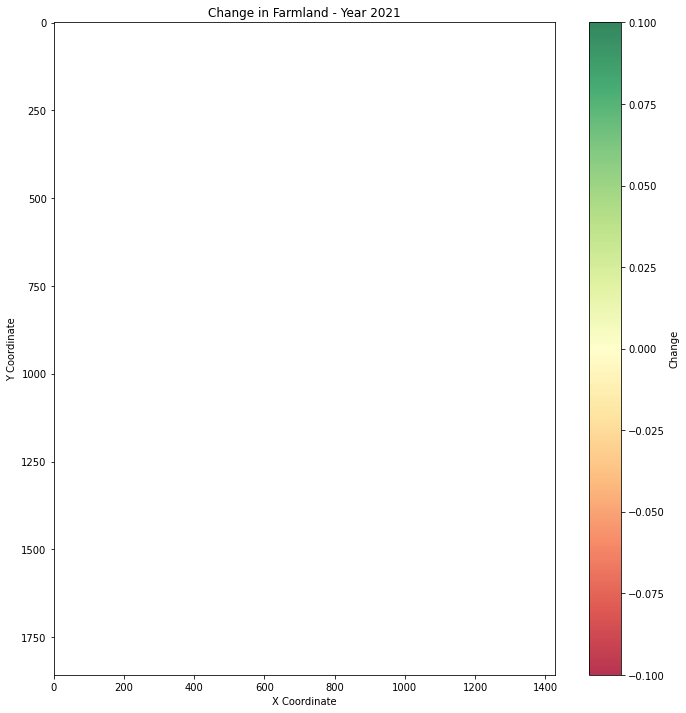

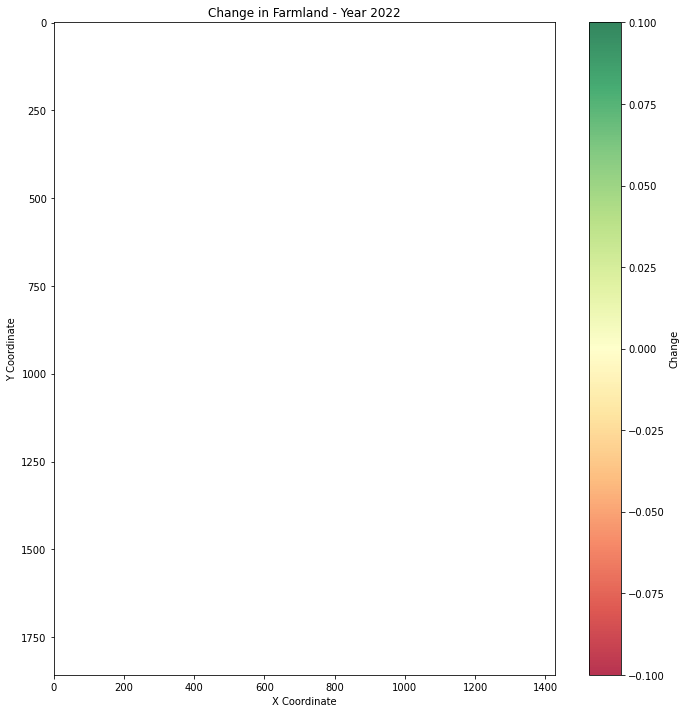

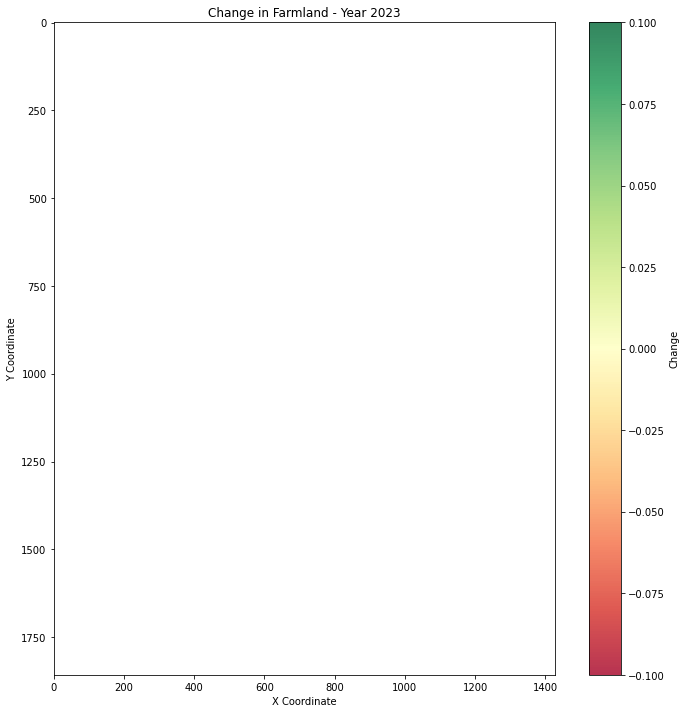

In [16]:
import matplotlib.pyplot as plt

def visualize_yearly_change(yearly_change, year):
    # Plot the changes using the "RdYlGn" colormap
    plt.figure(figsize=(12, 12))
    plt.imshow(yearly_change, cmap='RdYlGn', alpha=0.8)
    plt.title(f"Change in Farmland - Year {year}")
    plt.colorbar(label='Change')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Visualize the yearly changes
for i, yearly_change in enumerate(yearly_changes):
    year = 2014 + i  # Changes are calculated from the previous year
    visualize_yearly_change(yearly_change, year)


In [18]:
# Calculate the total farmland area for each year
total_farmland_per_year = []
for geotiff_path in geotiff_files:
    with rasterio.open(geotiff_path) as src:
        data = src.read(1)
        # Count the number of non-zero pixels (representing farmland)
        total_farmland = np.count_nonzero(data)
        total_farmland_per_year.append(total_farmland)

# Print the total farmland area for each year
for year, total in zip(range(2013, 2024), total_farmland_per_year):
    print(f"Year {year}: Total Farmland Area = {total} pixels")

Year 2013: Total Farmland Area = 1751296 pixels
Year 2014: Total Farmland Area = 1751296 pixels
Year 2015: Total Farmland Area = 1751296 pixels
Year 2016: Total Farmland Area = 1751296 pixels
Year 2017: Total Farmland Area = 1751296 pixels
Year 2018: Total Farmland Area = 1751296 pixels
Year 2019: Total Farmland Area = 1751296 pixels
Year 2020: Total Farmland Area = 1751296 pixels
Year 2021: Total Farmland Area = 1751296 pixels
Year 2022: Total Farmland Area = 1751296 pixels
Year 2023: Total Farmland Area = 1751296 pixels


In [19]:
# Calculate the yearly percentage change in farmland
percentage_changes = []
for i in range(1, len(total_farmland_per_year)):
    # Calculate the absolute change
    absolute_change = total_farmland_per_year[i] - total_farmland_per_year[i-1]
    # Calculate the percentage change relative to the previous year
    percentage_change = (absolute_change / total_farmland_per_year[i-1]) * 100
    # Store the percentage change
    percentage_changes.append(percentage_change)

# Print the yearly percentage changes
for year, percentage in zip(range(2014, 2024), percentage_changes):
    print(f"Year {year}: Percentage Change = {percentage:.2f}%")


Year 2014: Percentage Change = 0.00%
Year 2015: Percentage Change = 0.00%
Year 2016: Percentage Change = 0.00%
Year 2017: Percentage Change = 0.00%
Year 2018: Percentage Change = 0.00%
Year 2019: Percentage Change = 0.00%
Year 2020: Percentage Change = 0.00%
Year 2021: Percentage Change = 0.00%
Year 2022: Percentage Change = 0.00%
Year 2023: Percentage Change = 0.00%


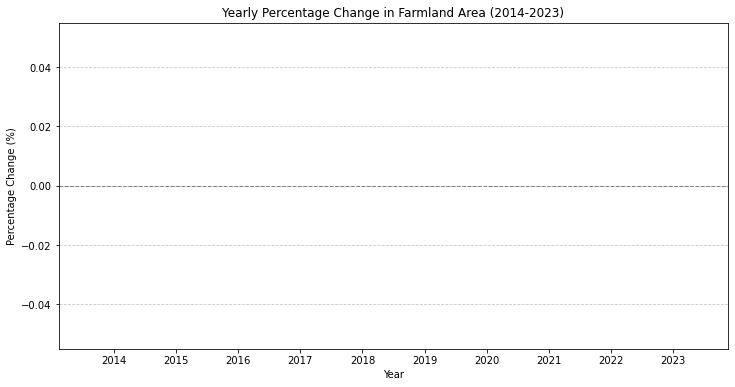

In [20]:
import matplotlib.pyplot as plt

# Visualize the yearly percentage changes
years = list(range(2014, 2024))
plt.figure(figsize=(12, 6))
plt.bar(years, percentage_changes, color='dodgerblue', alpha=0.7)
plt.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.title("Yearly Percentage Change in Farmland Area (2014-2023)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


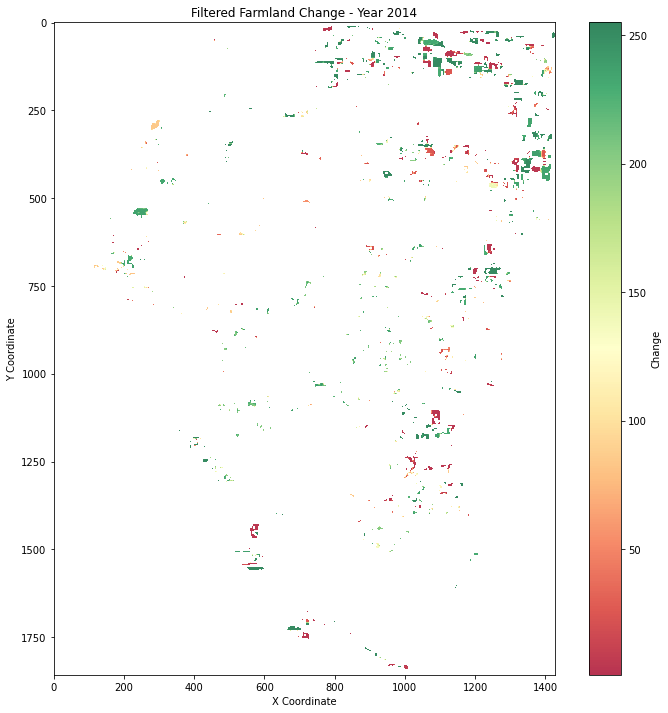

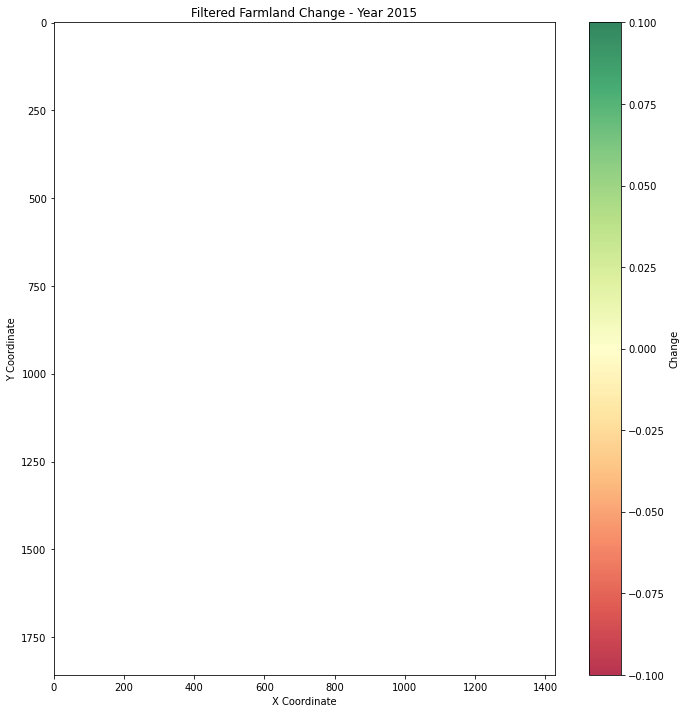

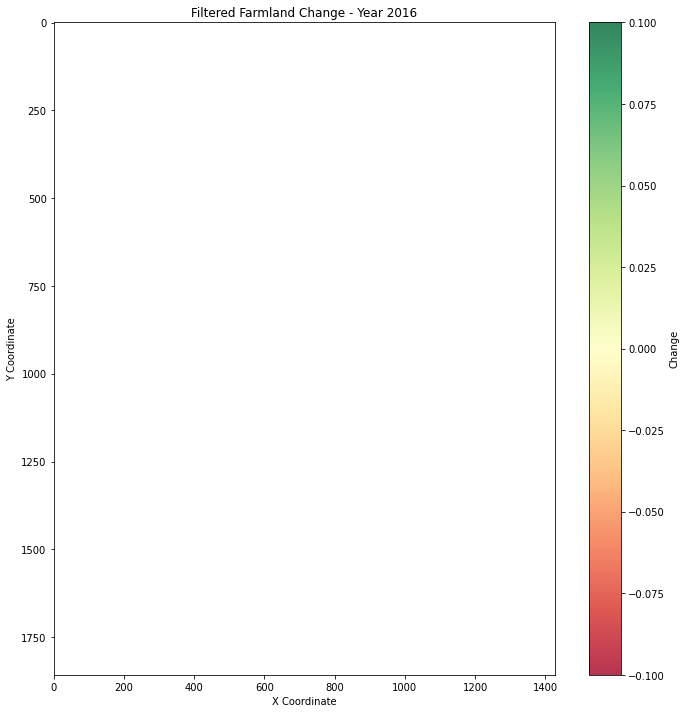

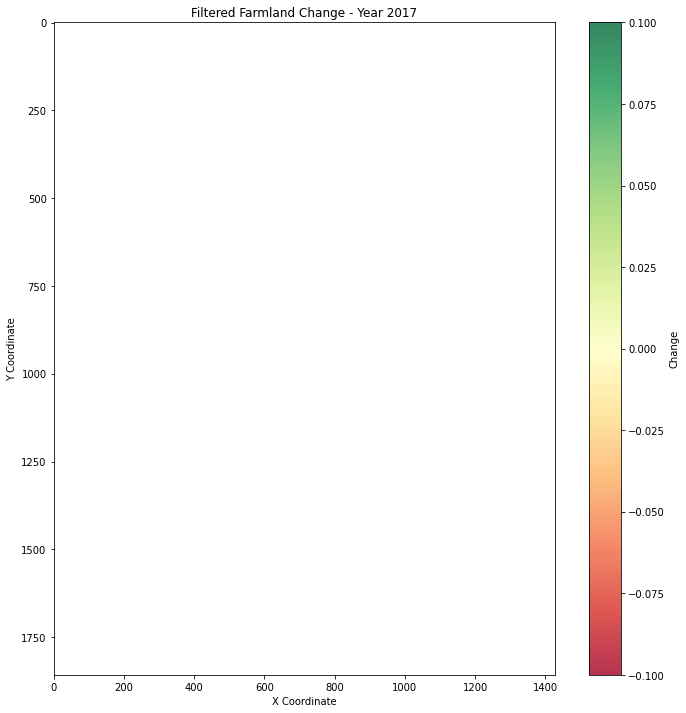

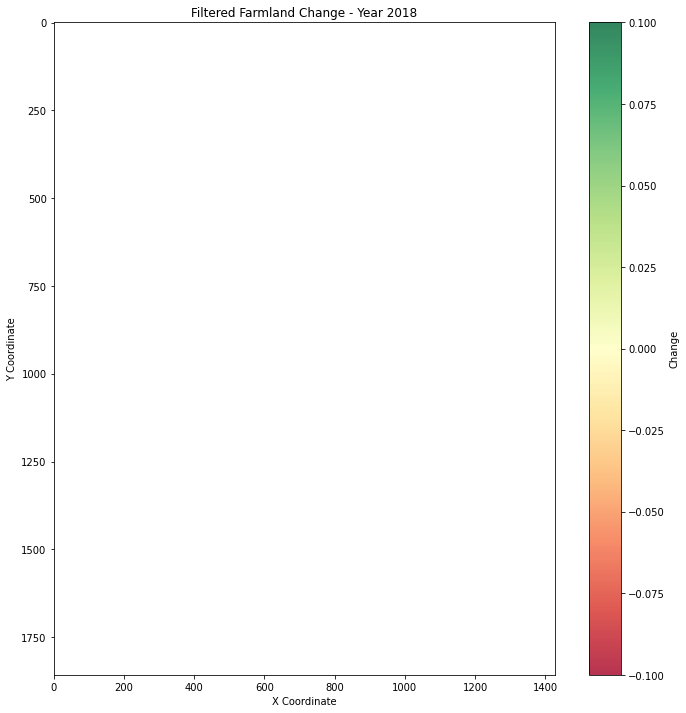

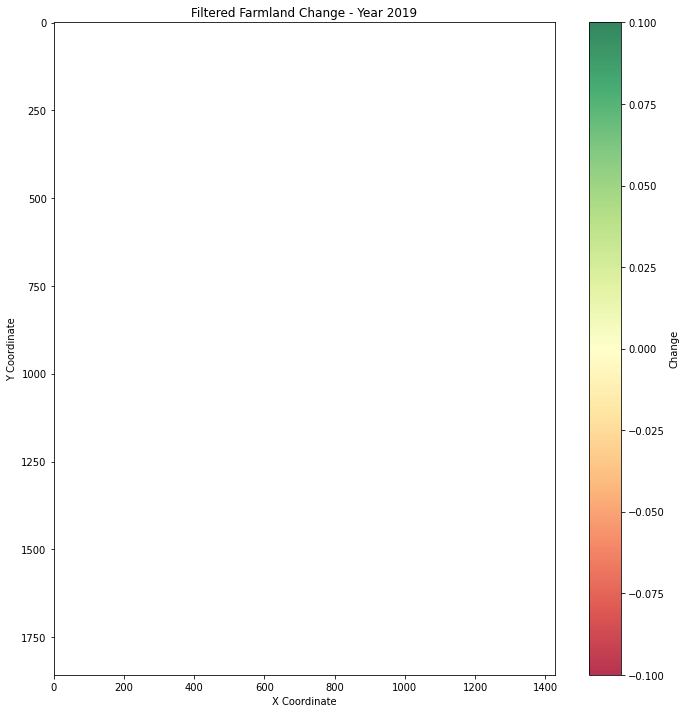

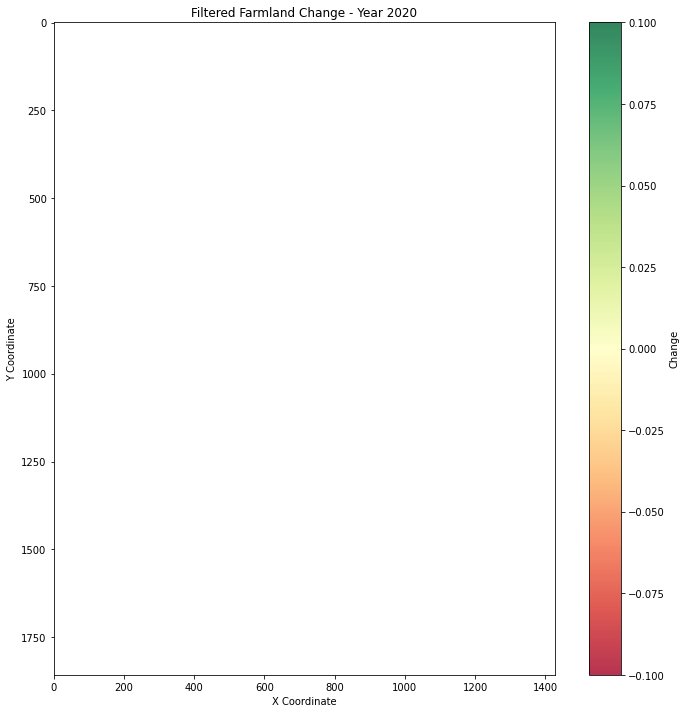

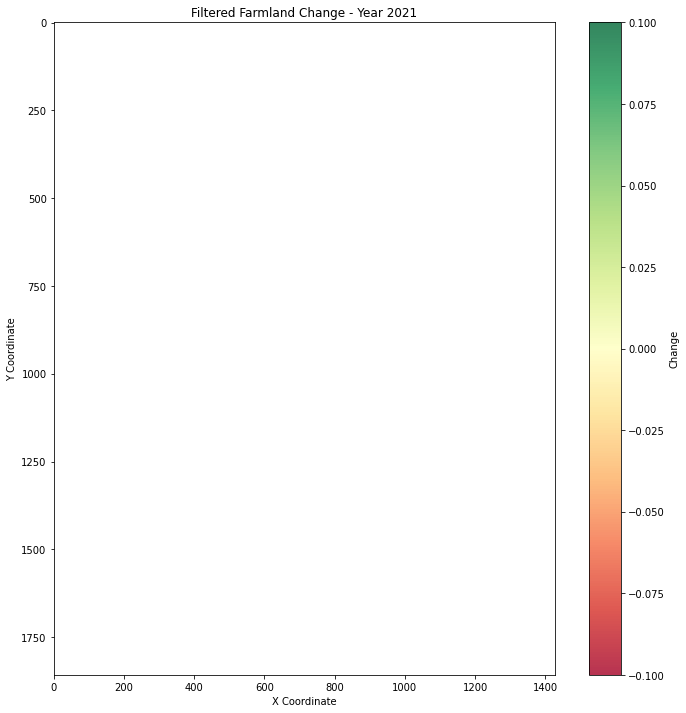

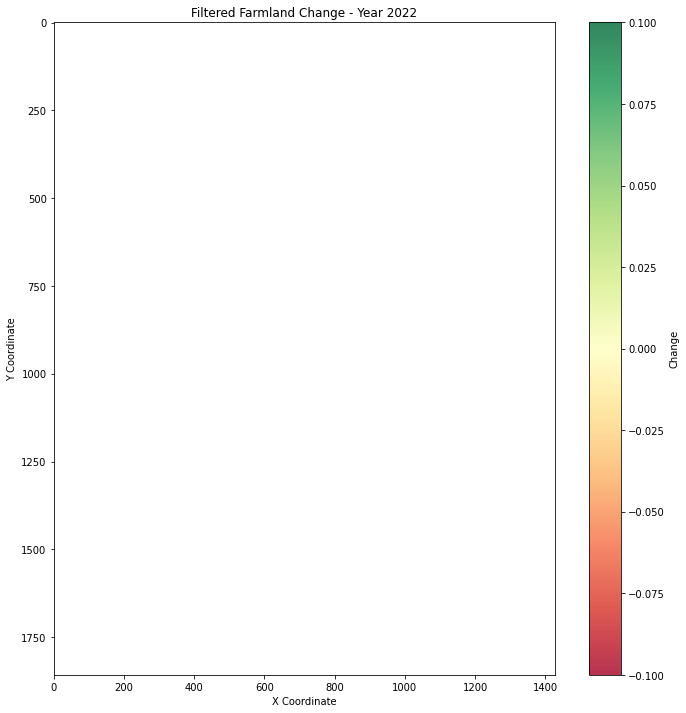

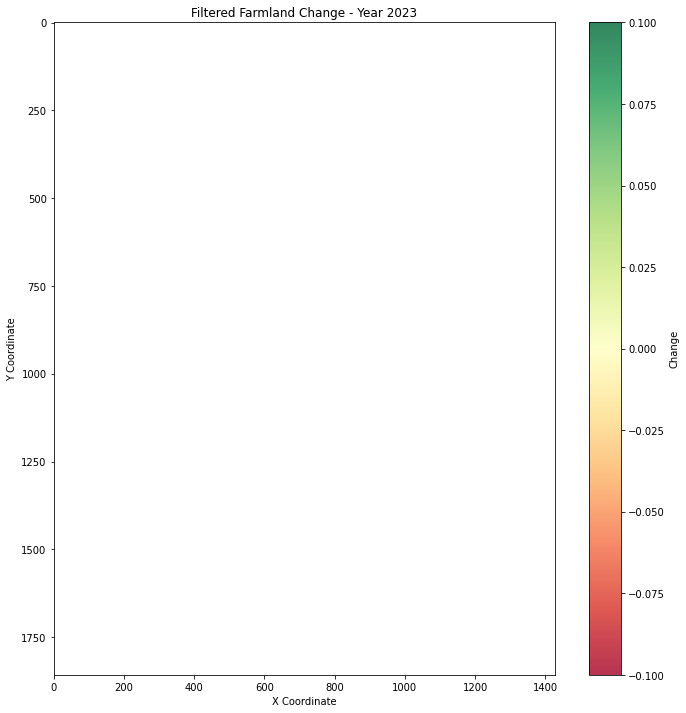

In [14]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Function to visualize filtered changes for each year
def visualize_filtered_change(yearly_change, year):
    plt.figure(figsize=(12, 12))
    plt.imshow(yearly_change, cmap='RdYlGn', alpha=0.8)
    plt.title(f"Filtered Farmland Change - Year {year}")
    plt.colorbar(label='Change')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Visualize the filtered changes for each year
for i, yearly_change in enumerate(yearly_changes):
    year = 2014 + i  # The change is calculated from the previous year
    visualize_filtered_change(yearly_change, year)


## Step 6: Visuals 

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [11]:
# Calculate the year-to-year percentage change in farmland
positive_percentage_changes = []
negative_percentage_changes = []

for i in range(1, len(geotiff_files)):
    with rasterio.open(geotiff_files[i]) as current_src, rasterio.open(geotiff_files[i-1]) as prev_src:
        current_data = current_src.read(1)
        prev_data = prev_src.read(1)
        
        # Calculate the total positive and negative changes
        positive_change = np.sum((current_data - prev_data) > 0)
        negative_change = np.sum((current_data - prev_data) < 0)
        
        # Calculate the total farmland pixels in the previous year
        total_farmland_prev_year = np.count_nonzero(prev_data)
        
        # Calculate the percentage changes
        positive_percentage = (positive_change / total_farmland_prev_year) * 100
        negative_percentage = (negative_change / total_farmland_prev_year) * 100
        
        # Store the results
        positive_percentage_changes.append(positive_percentage)
        negative_percentage_changes.append(negative_percentage)

# Print the year-to-year percentage changes
for year, pos_change, neg_change in zip(range(2014, 2024), positive_percentage_changes, negative_percentage_changes):
    print(f"Year {year}: Positive Change = {pos_change:.2f}%, Negative Change = {neg_change:.2f}%")


Year 2014: Positive Change = 31.05%, Negative Change = 0.00%
Year 2015: Positive Change = 0.00%, Negative Change = 0.00%
Year 2016: Positive Change = 0.00%, Negative Change = 0.00%
Year 2017: Positive Change = 0.00%, Negative Change = 0.00%
Year 2018: Positive Change = 0.00%, Negative Change = 0.00%
Year 2019: Positive Change = 0.00%, Negative Change = 0.00%
Year 2020: Positive Change = 0.00%, Negative Change = 0.00%
Year 2021: Positive Change = 0.00%, Negative Change = 0.00%
Year 2022: Positive Change = 0.00%, Negative Change = 0.00%
Year 2023: Positive Change = 0.00%, Negative Change = 0.00%


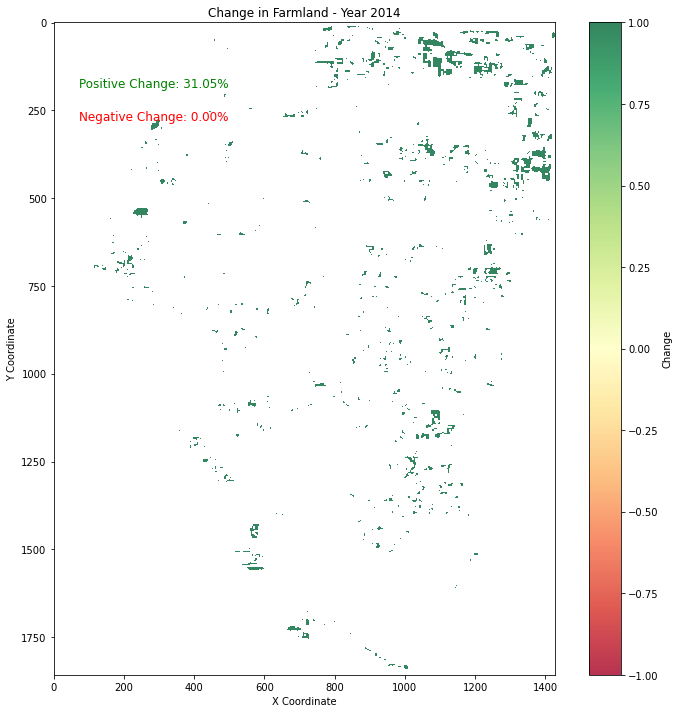

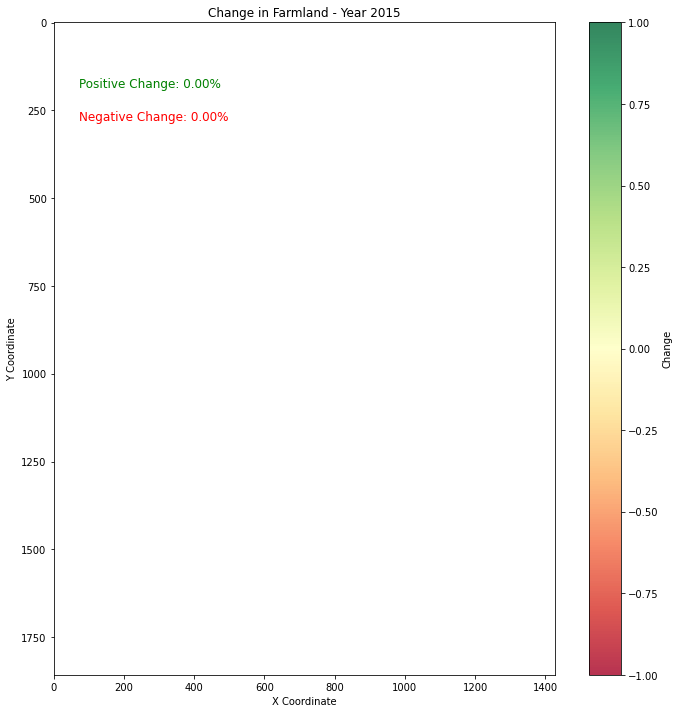

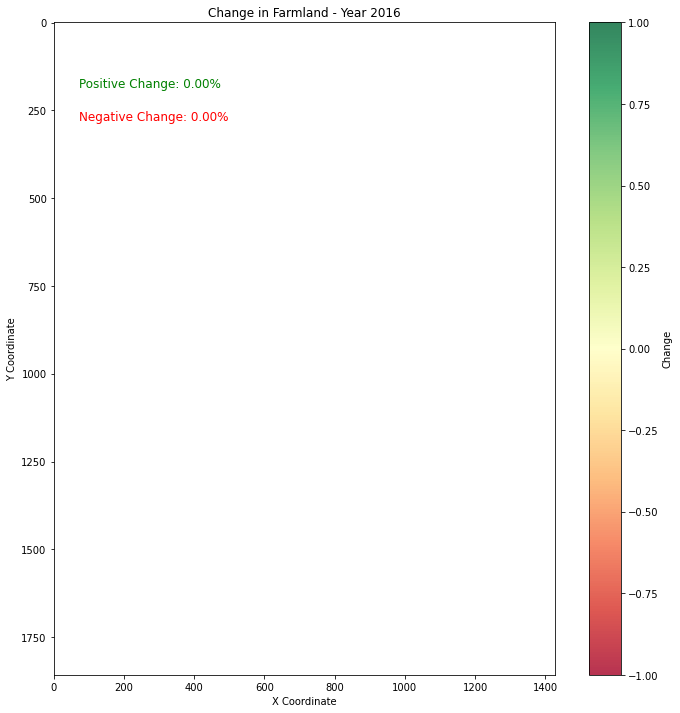

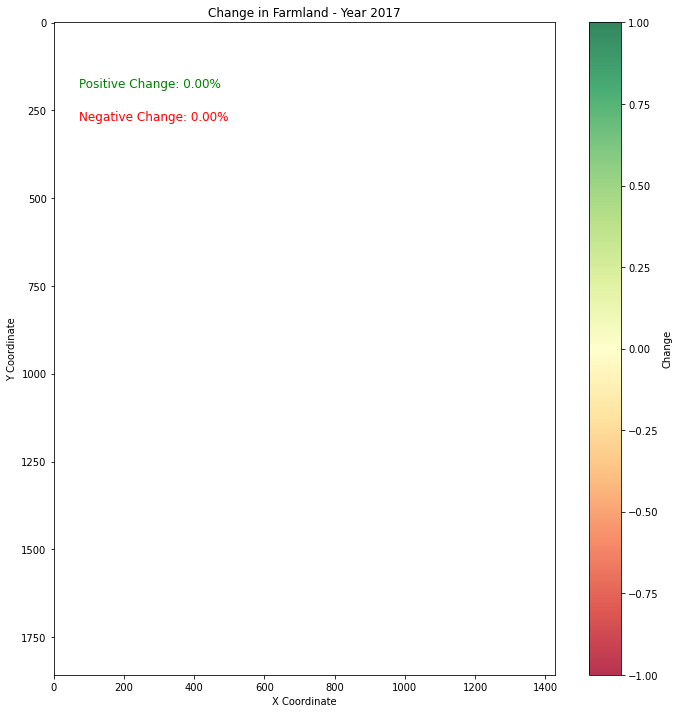

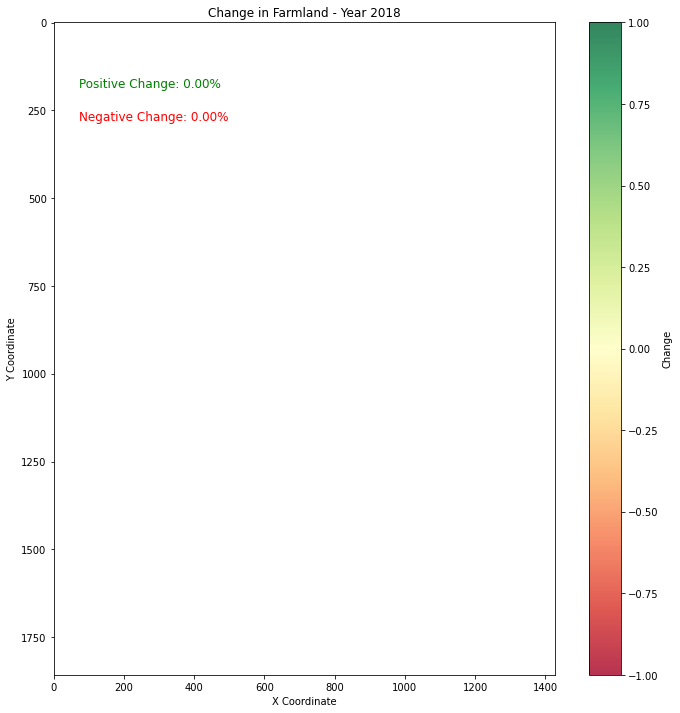

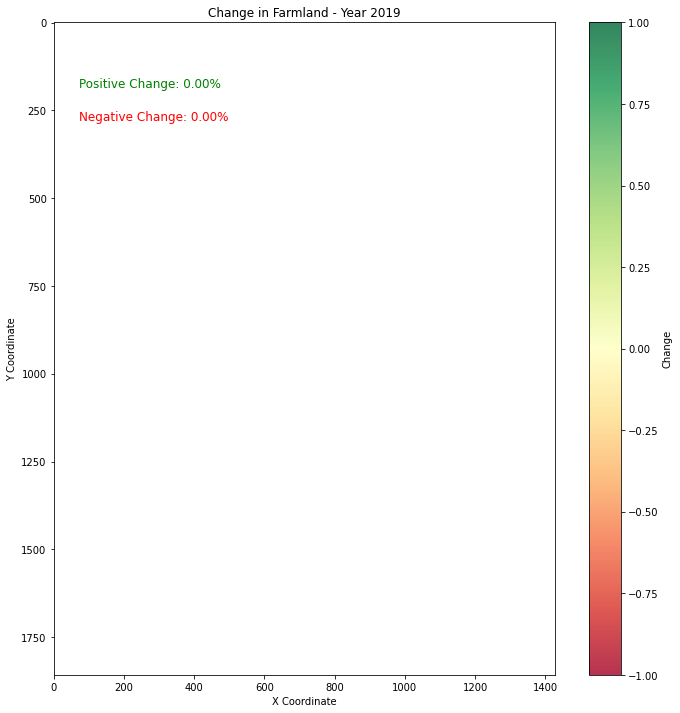

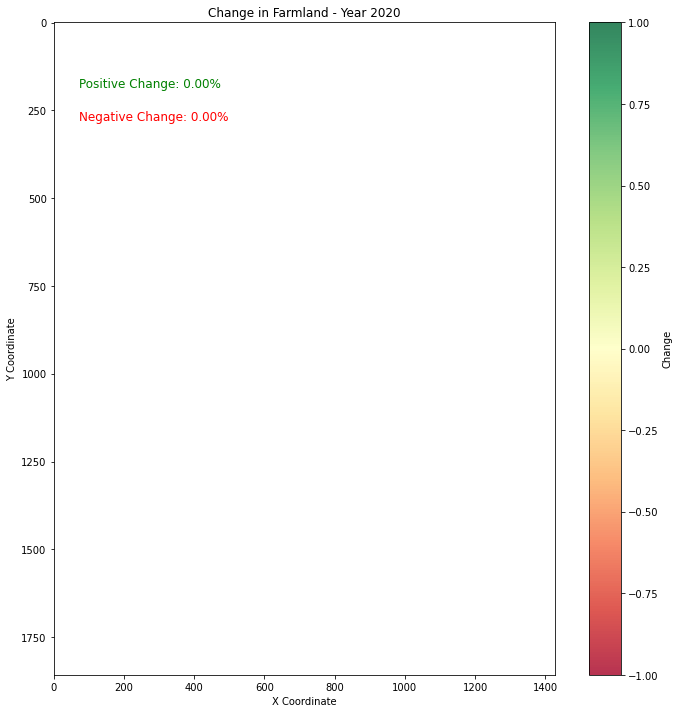

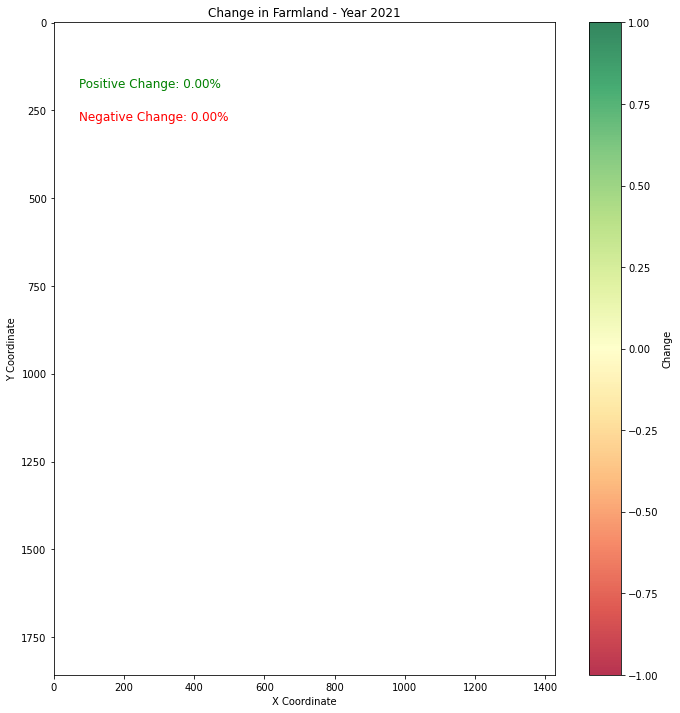

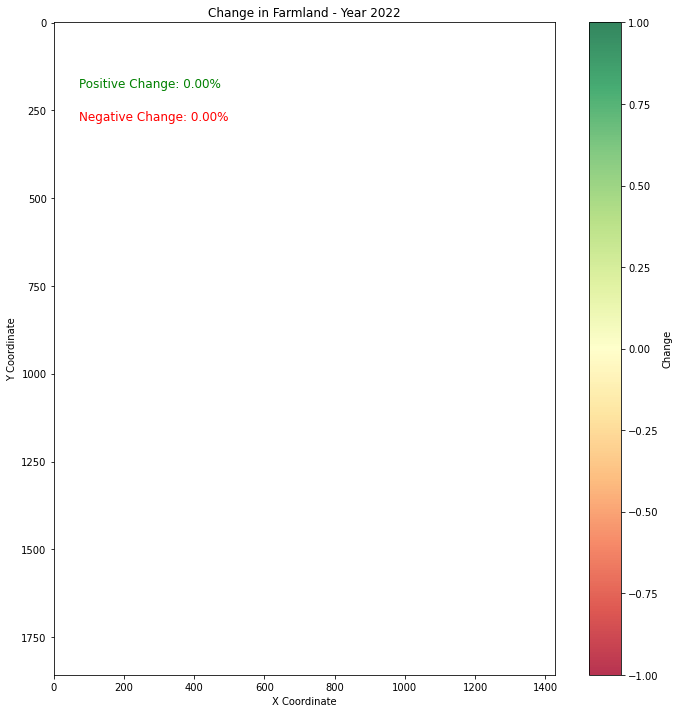

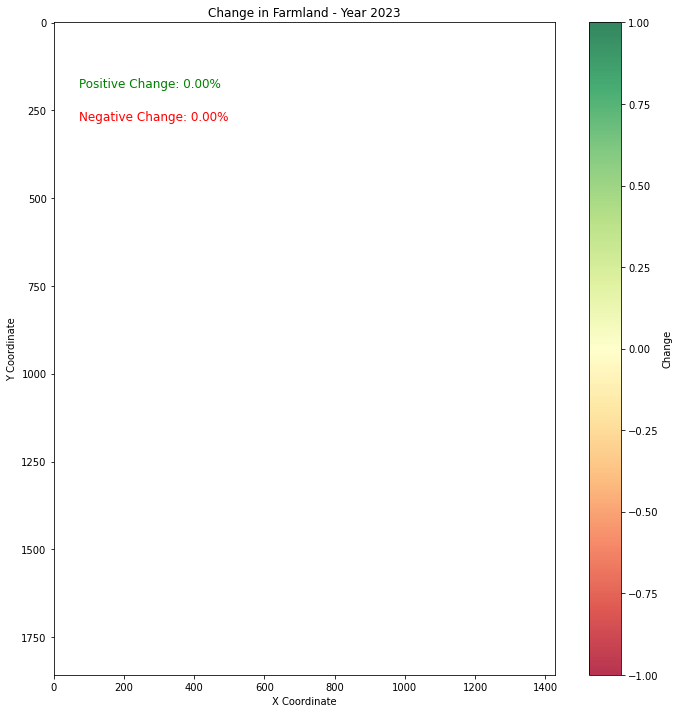

In [12]:
import matplotlib.pyplot as plt

def visualize_yearly_change(change_data, year, pos_change, neg_change):
    # Plot the changes using the "RdYlGn" colormap
    plt.figure(figsize=(12, 12))
    plt.imshow(change_data, cmap='RdYlGn', vmin=-1, vmax=1, alpha=0.8)
    plt.title(f"Change in Farmland - Year {year}")
    plt.colorbar(label='Change')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    # Annotate the percentage changes
    plt.annotate(f'Positive Change: {pos_change:.2f}%', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='green')
    plt.annotate(f'Negative Change: {neg_change:.2f}%', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='red')
    
    # Show the plot
    plt.show()

# Visualize the change for each year with annotations
for i, yearly_change in enumerate(yearly_changes):
    year = 2014 + i  # The change is calculated from the previous year
    pos_change = positive_percentage_changes[i]
    neg_change = negative_percentage_changes[i]
    visualize_yearly_change(yearly_change, year, pos_change, neg_change)


## Step 7 - Conclusion: Tell the Story
In a few paragraphs, tell your data story including the visualizations you created. This should be a stand-alone story to your audience. 


## Step 8: Post to Slack

Pick the one key visual story element that you have developed and post it along with a brief explanation of what and why you did this analysis as well as the interpreation of your results and potential impact.


# Save your notebook, then `File > Close and Halt`